<a href="https://colab.research.google.com/github/Ashi743/ML-practices/blob/main/Gradient_boosting_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Regression


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px

In [ ]:
np.random.seed(2)
x=np.random.rand(100,1) -0.5
y= 3*x[:,0]**2 +0.05* np.random.randn(100)

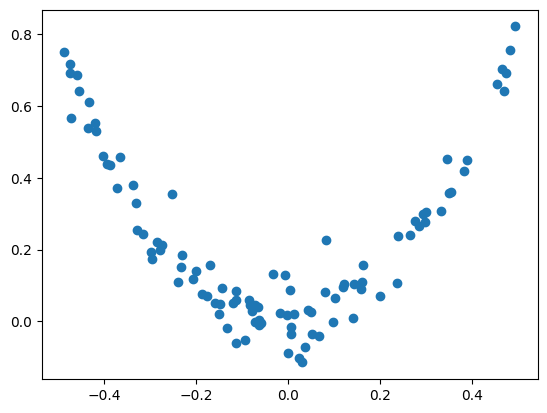

In [ ]:
plt.scatter(x,y)

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [ ]:
df=pd.DataFrame({'x':x.flatten(),'y':y})
df.head()

,x,y
0,-0.064005,-0.010810
1,-0.474074,0.691782
2,0.049662,0.026492
3,-0.064678,0.040863
4,-0.079632,0.029234


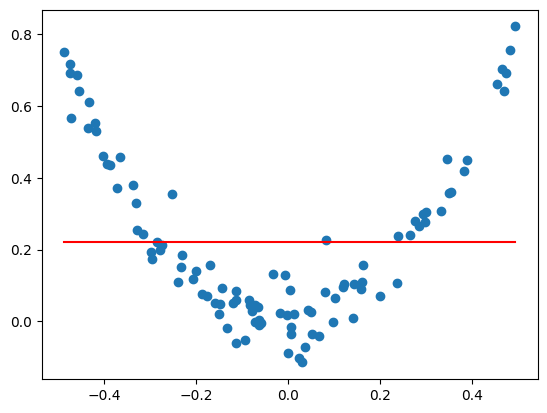

In [ ]:
df['F0']= df['y'].mean()
x_rnge= np.linspace(df['x'].min(),df['x'].max(),100)
plt.scatter(x,y)

plt.plot(x_rnge,df['F0'],color='r')

In [ ]:


res1=df['y']-df['F0']
res1
dt1=DecisionTreeRegressor(max_depth=4)
dt1.fit(x ,res1)
y_pred1=dt1.predict(x_rnge.reshape(-1,1))
y_pred1.shape

(100,)

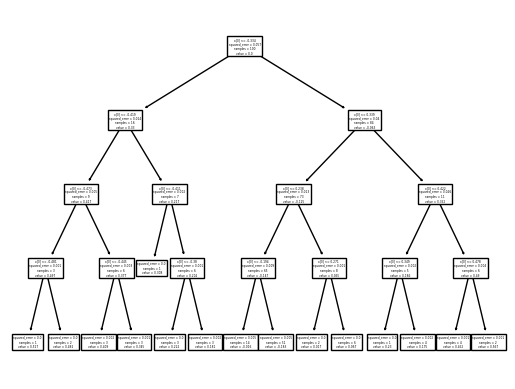

In [ ]:
plot_tree(dt1)
plt.show()

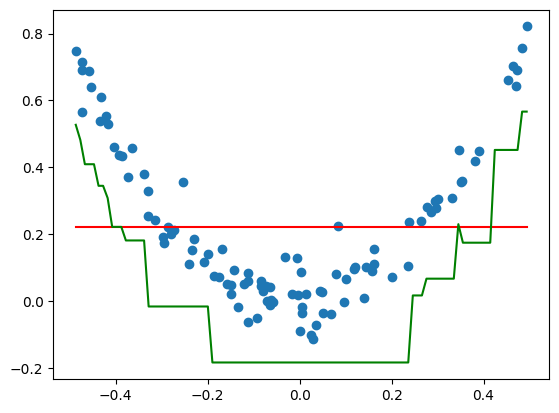

In [ ]:
plt.scatter(x,y)
plt.plot(x_rnge,df['F0'],color='r')
plt.plot(x_rnge,y_pred1,color='g')
plt.show()

In [ ]:
df["F1"]= df['F0'] +dt1.predict(x.reshape(100,1))

In [ ]:
res2=df['y']-df['F1']
dt2=DecisionTreeRegressor(max_depth=4)
dt2.fit(x ,res2)
y_pred2=dt2.predict(x_rnge.reshape(-1,1))
y_pred2.shape


(100,)

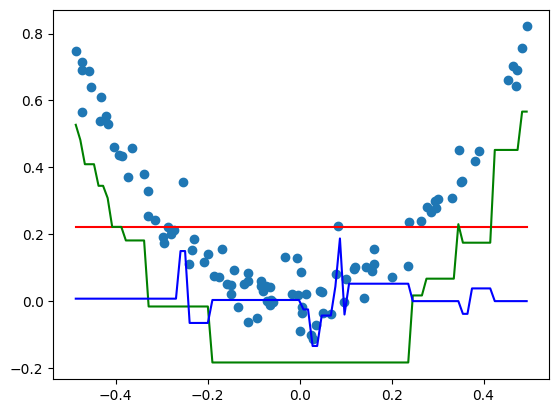

In [ ]:
plt.scatter(x,y)
plt.plot(x_rnge,df['F0'],color='r')
plt.plot(x_rnge,y_pred1,color='g')
plt.plot(x_rnge,y_pred2,color='b')

plt.show()

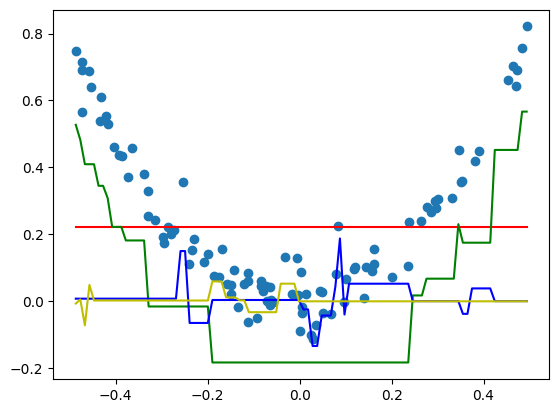

In [ ]:
df["F2"]= df['F0'] +dt1.predict(x.reshape(100,1))+ dt2.predict(x.reshape(100,1))

res3=df['y']-df['F2']
dt3=DecisionTreeRegressor(max_depth=4)
dt3.fit(x ,res3)
y_pred3=dt3.predict(x_rnge.reshape(-1,1))
y_pred3.shape

plt.scatter(x,y)
plt.plot(x_rnge,df['F0'],color='r')
plt.plot(x_rnge,y_pred1,color='g')
plt.plot(x_rnge,y_pred2,color='b')
plt.plot(x_rnge,y_pred3,color='y')

plt.show()

In [ ]:
df["F3"]= df['F0'] +dt1.predict(x.reshape(100,1))+ dt2.predict(x.reshape(100,1))+ dt3.predict(x.reshape(100,1))

In [ ]:
df['res1']=res1
df['res2']=res2
df['res3']=res3

In [ ]:

print("MSE for F0",mean_squared_error(df['y'],df['F0']))
print("MSE for F1",mean_squared_error(df['y'],df['F1']))
print("MSE for F2",mean_squared_error(df['y'],df['F2']))
print("MSE for F3",mean_squared_error(df['y'],df['F3']))

MSE for F0 0.056632955734831424
MSE for F1 0.0033657823718315056
MSE for F2 0.0013975855435172696
MSE for F3 0.0010048720010138721


In [ ]:
df.head()

,x,y,F0,F1,F2,F3,res1,res2,res3
0,-0.064005,-0.010810,0.222006,0.038553,0.041965,0.008902,-0.232816,-0.049363,-0.052776
1,-0.474074,0.691782,0.222006,0.704072,0.711427,0.691782,0.469776,-0.012290,-0.019645
2,0.049662,0.026492,0.222006,0.038553,-0.004566,-0.005093,-0.195514,-0.012060,0.031059
3,-0.064678,0.040863,0.222006,0.038553,0.041965,0.008902,-0.181143,0.002311,-0.001102
4,-0.079632,0.029234,0.222006,0.038553,0.041965,0.008902,-0.192772,-0.009318,-0.012731


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor

def grad_boost_reg(X, y, lr, n, count=1, regs=None, F0=None):
    if regs is None:
        regs = []

    if n == 0:
        return

    if count == 1:
        # Initial prediction is the mean of y
        F0 = np.mean(y)
        y_residual = y - F0
    else:
        y_residual = y - sum(lr * regressor.predict(X) for regressor in regs)

    regressor = DecisionTreeRegressor(max_depth=4)
    regressor.fit(X, y_residual)
    regs.append(regressor)

    x_range = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
    y_pred_range = F0 + sum(lr * regressor.predict(x_range) for regressor in regs)

    print(f"Iteration: {count}")
    plt.scatter(X, y, label="Original Data")
    plt.plot(x_range, y_pred_range, color='g', label="Boosted Prediction")
    plt.xlabel("X")
    plt.ylabel("y")
    plt.title(f"Gradient Boosting - Iteration {count}")
    plt.legend()
    plt.show()

    grad_boost_reg(X, y, lr, n - 1, count + 1, regs, F0)


Iteration: 1


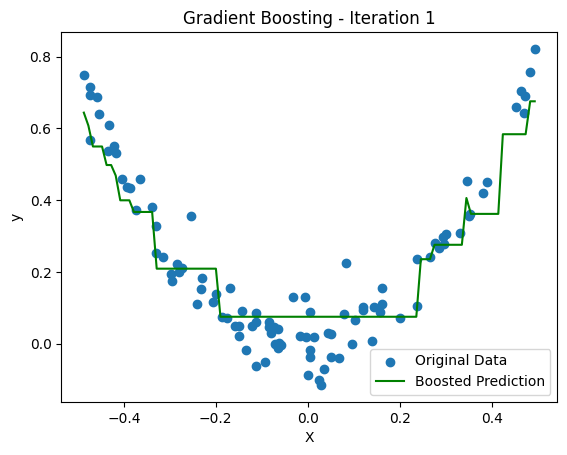

Iteration: 2


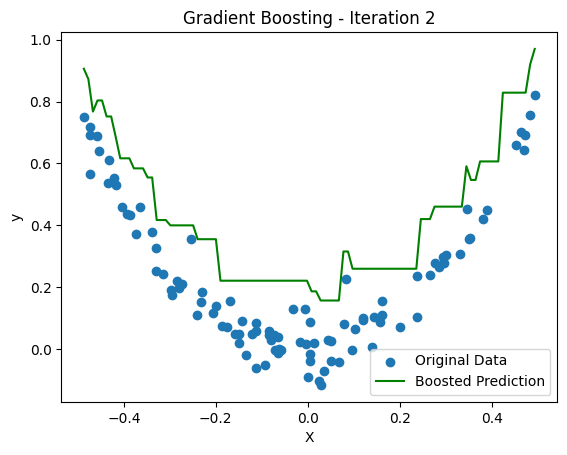

Iteration: 3


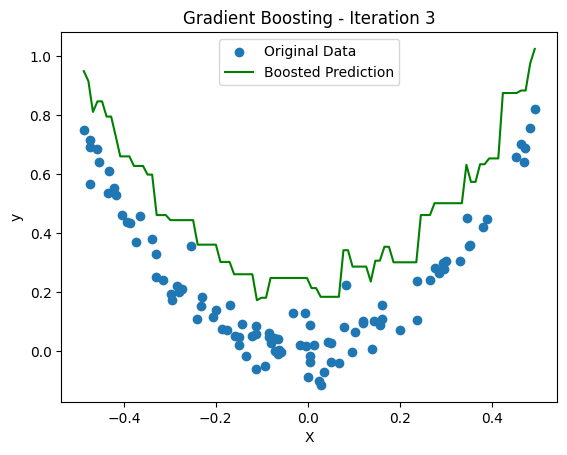

Iteration: 4


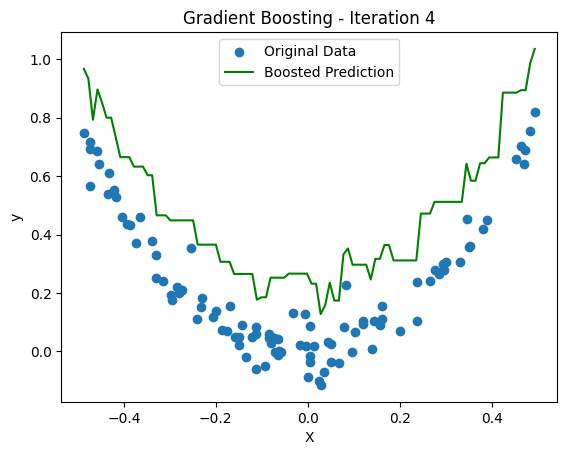

Iteration: 5


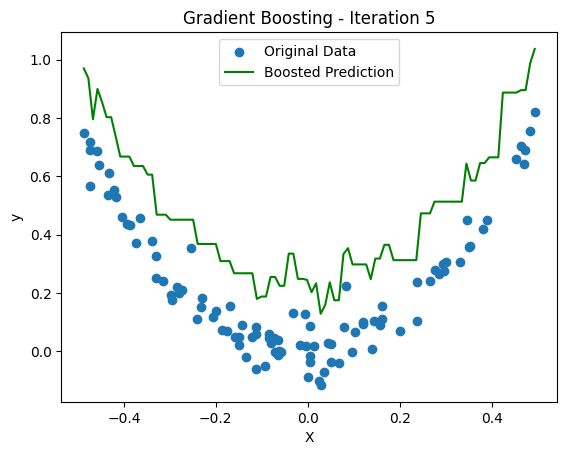

In [ ]:
grad_boost_reg(x,y,0.8,5)

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor


In [ ]:
gsbr= GradientBoostingRegressor(n_estimators=100,learning_rate=0.8,max_depth=4)
gsbr.fit(x,y)
gsbr.score(x,y)

0.9999999999997511

In [ ]:
y_pred_gsbr= gsbr.predict(x.reshape(-1,1))
y_pred_gsbr_x_range=gsbr.predict(x_rnge.reshape(-1,1))

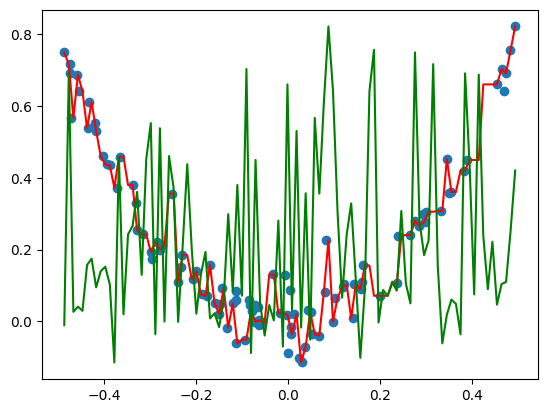

In [ ]:
plt.scatter(x,y)
plt.plot(x_rnge,y_pred_gsbr_x_range,color='r')
plt.plot(x_rnge,y_pred_gsbr,color='g')
plt.show()

Key Points
Original Data Points (X):

Predictions on the original data points X can appear "noisy" or "hotchpotch" because they directly reflect the predictions made on the potentially irregular or sparse distribution of the training data.
Any variability or noise in the training data is directly visible in these predictions.
Range of Values (np.linspace):

Using np.linspace to generate a range of values creates a smooth and evenly spaced set of points.
Predictions on these points often appear smoother because they provide a more continuous view of the model's learned function, free from the irregularities of the training data distribution.
Improved Function

In [146]:
class CustomGradientBoostingRegressor:

    def __init__(self, learning_rate, n_estimators, max_depth=1):
        self.learning_rate = learning_rate
        self.n_estimators = n_estimators
        self.max_depth = max_depth
        self.trees = []

    def fit(self, X, y):

        self.F0 = y.mean()
        Fm = self.F0

        for _ in range(self.n_estimators):
            r = y - Fm
            tree = DecisionTreeRegressor(max_depth=self.max_depth, random_state=0)
            tree.fit(X, r)
            gamma = tree.predict(X)
            Fm += self.learning_rate * gamma
            self.trees.append(tree)

    def predict(self, X):

        Fm = self.F0

        for i in range(self.n_estimators):
            Fm += self.learning_rate * self.trees[i].predict(X)

        return Fm

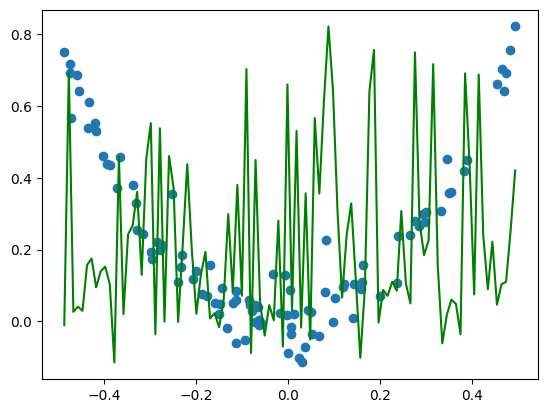

In [151]:
CustomGrad=CustomGradientBoostingRegressor(learning_rate=0.8,n_estimators=100,max_depth=4)
CustomGrad.fit(x,y)
y_pred_CustomGrad=CustomGrad.predict(x.reshape(-1,1))
plt.scatter(x,y)
plt.plot(x_rnge,y_pred_CustomGrad,color='g')
plt.show()